In [1]:
# Import
from plots import *
from PMs import *

import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import math
import PMs
import seaborn as sns
from matplotlib.pyplot import figure
#import Es_graph2
#import graphs
from mpl_toolkits import mplot3d
from sklearn import linear_model
from scipy.stats import spearmanr

e_0 = 8.8541878128e-12
fc = 50000000
pi = 3.141592653589793
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
"""     Reading the data of the MS and XRF  """

df = pd.read_excel("data/MS_XRF_text.xlsx")

                  ############################# FILTERS! ###############################
    
df = df[df.Kim_F1 > 0]

In [3]:
filtered_features = ['Depth', 'Kre_F1', 'Kre_F3', 'kfd_abs', 'kfd', 'SiO2', 'Bulk_density', 'Zr', 'Sr', 'Rb', 'Th', 'Pb', 'As', 'Zn', 'Cu', 
              #      'Au', 'Se', 'U', 'W', 'Hg', 'Re', 'Ta', 'Hf', 'Sn', 'Cd', 'Ag', 'Pd', 'Bal', 'Sb', 'P',
                    'Ni', 'Co', 'Fe', 'Mn', 'Cr', 'V', 'Ti', 'Ca', 'K', 'S', 'Ba', 'Nb', 'Bi', 'Al', 'Si', 'Cl', 
                     'Mg', 'Sc', 'Cs', 'Te', 'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df[filtered_features], nan_policy='omit')

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)
p_value_df = pd.DataFrame(p_value, index=filtered_features, columns=filtered_features)

# Create a mask for significant p-values (e.g., p < 0.01)
p_value_mask = 0.001
significant_mask = p_value_df < p_value_mask

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Combine the masks
final_mask = mask | ~significant_mask

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1, annot_kws={"size": 8})

# Adjust layout for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.title('Spearman Rank Correlation Heatmap showing significant P-Values < '+str(p_value_mask), fontsize=12, fontweight='bold')

# Show the plot
folder_path = 'figures_output/'
filename = f"Corr_XRF.png"
plt.savefig(folder_path + filename)
plt.show()

<IPython.core.display.Javascript object>

In [4]:
df.plot.scatter(x="Cu", y="Kre_F1")
df.plot.scatter(x="Pb", y="Kre_F1")
df.plot.scatter(x="Rb", y="Kre_F1")
df.plot.scatter(x="Fe", y="Kre_F1")
df.plot.scatter(x="Ti", y="Kre_F1")
df.plot.scatter(x="Ti", y="Fe")
df.plot.scatter(x="Cu", y="Pb")
df.plot.scatter(x="Cu", y="Ti")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Cu', ylabel='Ti'>

In [6]:
fig, ((site1, site2), (site3, site4), (site5, site6), (site7, site8)) = plt.subplots(4, 2,  figsize=(10, 14))
fig.subplots_adjust(hspace=0.4)

site1.scatter(df.kfd[df['SAMPLE'].str.startswith("A")],     df.kfd_abs[df['SAMPLE'].str.startswith("A")],    s=df.Depth[df['SAMPLE'].str.startswith("A")] ,    c = "cornflowerblue", label = 'P Site')
site2.scatter(df.kfd[df['SAMPLE'].str.startswith("E")],     df.kfd_abs[df['SAMPLE'].str.startswith("E")],    s=df.Depth[df['SAMPLE'].str.startswith("E")],     c = "blue", label = 'E Site' )
site6.scatter(df.kfd[df['SAMPLE'].str.startswith("S")],     df.kfd_abs[df['SAMPLE'].str.startswith("S")],    s=df.Depth[df['SAMPLE'].str.startswith("S")],     c = "orange", label = 'S Site')
site5.scatter(df.kfd[df['SAMPLE'].str.startswith("P")],     df.kfd_abs[df['SAMPLE'].str.startswith("P")],    s=df.Depth[df['SAMPLE'].str.startswith("P")],     c = "navy", label = 'P Site')
site3.scatter(df.kfd[df['SAMPLE'].str.startswith("HE")],    df.kfd_abs[df['SAMPLE'].str.startswith("HE")],   s=df.Depth[df['SAMPLE'].str.startswith("HE")],    c = "indianred", label = 'HE Site')
site4.scatter(df.kfd[df['SAMPLE'].str.startswith("L")],     df.kfd_abs[df['SAMPLE'].str.startswith("L")],    s=df.Depth[df['SAMPLE'].str.startswith("L")],     c = "bisque", label = 'L Site')
site7.scatter(df.kfd[df['SAMPLE'].str.startswith("D")],     df.kfd_abs[df['SAMPLE'].str.startswith("D")],    s=df.Depth[df['SAMPLE'].str.startswith("D")],     c = "firebrick", label = 'Dren Site')
site8.scatter(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], s=df.Depth[df['SAMPLE'].str.startswith("HOEKE")], c = "teal", label = 'Hoeke Site')

site8.scatter(df.kfd[df['SAMPLE'].str.startswith("V")],     df.kfd_abs[df['SAMPLE'].str.startswith("V")],    s=df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')

#sites(site1, site2, site3, site4, site5, site6, site7, site8, plt)

site1.set_ylabel('Kfd abs', fontsize = 16) 
site2.set_ylabel('Kfd abs', fontsize = 16) 
site3.set_ylabel('Kfd abs', fontsize = 16) 
site4.set_ylabel('Kfd abs', fontsize = 16) 
site5.set_ylabel('Kfd abs', fontsize = 16) 
site6.set_ylabel('Kfd abs', fontsize = 16) 
site7.set_ylabel('Kfd abs', fontsize = 16) 
site8.set_ylabel('Kfd abs', fontsize = 16) 

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Kfd abs')

In [7]:
fig, ((site1, site2), (site3, site4), (site5, site6), (site7, site8)) = plt.subplots(4, 2,  figsize=(10, 14))
fig.subplots_adjust(hspace=0.4)

site1.scatter(df.kfd[df['SAMPLE'].str.startswith("A")],  df.F1mass[df['SAMPLE'].str.startswith("A")], s=df.Depth[df['SAMPLE'].str.startswith("A")] ,c = "cornflowerblue", label = 'P Site')
site2.scatter(df.kfd[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")], s=df.Depth[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site' )


site6.scatter(df.kfd[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")], s=df.Depth[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
site5.scatter(df.kfd[df['SAMPLE'].str.startswith("P")], df.F1mass[df['SAMPLE'].str.startswith("P")], s=df.Depth[df['SAMPLE'].str.startswith("P")], c = "navy", label = 'P Site')
site3.scatter(df.kfd[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")], s=df.Depth[df['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
site4.scatter(df.kfd[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")], s=df.Depth[df['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
site7.scatter(df.kfd[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")], s=df.Depth[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
site8.scatter(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], s=df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

site8.scatter(df.kfd[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")], s=df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')

#sites(site1, site2, site3, site4, site5, site6, site7, site8, plt)

<IPython.core.display.Javascript object>

In [8]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")

s_array = df[['Pb', 'Cu']].to_numpy()
#print(df.Kre_F1)
reg = linear_model.LinearRegression().fit(s_array, df.F1mass)
print('Susceptibility score', reg.score(s_array, df.F1mass))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cu_ = np.linspace(df.Cu.min(), df.Cu.max(), 100)
pb_ = np.linspace(df.Pb.min(), df.Pb.max(), 100)

PB_, CU_ = np.meshgrid(pb_, cu_)

susc1_ = PMs.IOPsusc1(PB_, CU_)

axa.scatter(df.Pb[:23], df.Cu[:23], df.F3mass[:23],  c = "darkorange", s = 15, label = 'Arch')
axa.scatter(df.Pb[23:], df.Cu[23:], df.F3mass[23:],  c = "blue", s = 15, label = 'Agric')
axa.plot_surface(PB_, CU_, susc1_)
#axa.plot_surface(X, Y, cec_IOPped)

<IPython.core.display.Javascript object>

Susceptibility score 0.6662905494984461
coefficients of equation of plane, (a1, a2):  [0.60120581 0.28417551]
value of intercept, c: -2.3757134077189477


AttributeError: module 'PMs' has no attribute 'IOPsusc1'

In [9]:
fig = plt.figure()
axb =  fig.add_subplot(projection = "3d")

s_array = df[['Pb', 'Cu']].to_numpy()
#print(df.Kre_F1)
reg = linear_model.LinearRegression().fit(s_array, df.F3mass)
print('Susceptibility score', reg.score(s_array, df.F3mass))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cu_ = np.linspace(df.Cu.min(), df.Cu.max(), 100)
pb_ = np.linspace(df.Pb.min(), df.Pb.max(), 100)

PB_, CU_ = np.meshgrid(pb_, cu_)

susc2_ = ptf.IOPsusc2(PB_, CU_)

#df[(df.val > 0.5) & (df.val2 == 1)]

axb.scatter(df.Pb[:23], df.Cu[:23], df.F3mass[:23],  c = "darkorange", s = 15, label = 'Arch')
axb.scatter(df.Pb[23:], df.Cu[23:], df.F3mass[23:],  c = "blue", s = 15, label = 'Agric')

axb.plot_surface(PB_, CU_, susc2_)
#axa.plot_surface(X, Y, cec_IOPped)

<IPython.core.display.Javascript object>

Susceptibility score 0.6656196423488223
coefficients of equation of plane, (a1, a2):  [0.57026916 0.26638581]
value of intercept, c: -2.2626152660618555


NameError: name 'ptf' is not defined

In [10]:
df.plot.scatter(x="Kre_F1", y="kfd"  )


<IPython.core.display.Javascript object>

<Axes: xlabel='Kre_F1', ylabel='kfd'>

In [ ]:
corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

f = (3.790536 + 3.699295 + 3.531568 + 3.752891 + 3.814403)/5
print(f)
plt.figure(figsize=(20, 20))
plt.show()

NameError: name 'df' is not defined

In [11]:
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(10, 8))
a=0.7
lw=3

xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.plot(df.kfd[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
#xc2.plot(df.kfd[df['SAMPLE'].str.startswith("E0")&('E1')], -df.Depth[df['SAMPLE'].str.startswith("E")&('E1')], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.set_ylabel('Depth', fontsize = 16) 
xc2.set_xlabel('Kfd', fontsize = 16) 
xc2.legend(loc='lower right', fontsize = 7)
xc2.set_xlim(0, 15) 
xc2.axvline(x = 10, color = 'b')


xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw, c = "indianred", label = 'HE Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw ,c = "firebrick", label = 'Dren Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw, c = "teal", label = 'Hoeke Site')

prof(xc1, xc2, xc3, plt)

xc1.set_xlim(1, 50) 
xc1.set_xlabel('F1mass', fontsize = 16) 

xc3.set_xlim(0, 3.5*10**-5) 
xc3.set_xlabel('Kim_F1', fontsize = 16) 

<IPython.core.display.Javascript object>

NameError: name 'prof' is not defined

<IPython.core.display.Javascript object>


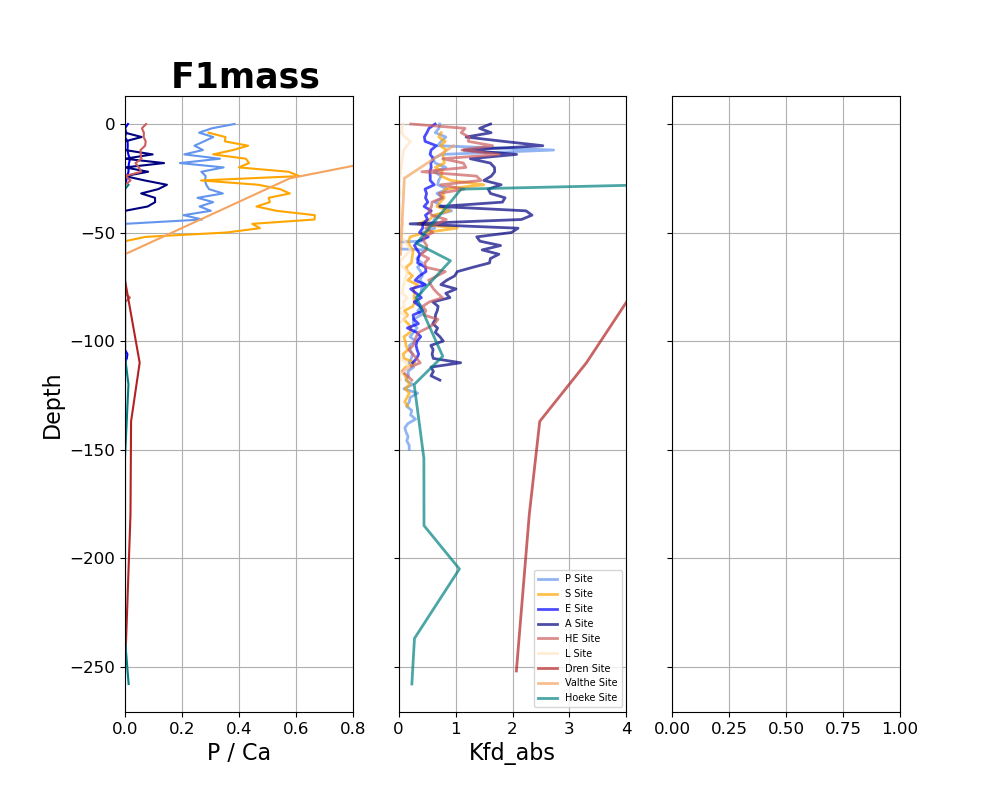

Text(0.5, 0, 'P / Ca')

In [ ]:
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(10, 8))

lw = 2
xc1.plot(df.P[df['SAMPLE'].str.startswith("P")]/df.Ca[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")],  c = "cornflowerblue", label = 'P Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("S")]/df.Ca[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("E")]/df.Ca[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site' )
xc1.plot(df.P[df['SAMPLE'].str.startswith("A")]/df.Ca[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], c = "navy", label = 'A Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("HE")]/df.Ca[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("L")]/df.Ca[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("D")]/df.Ca[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("V")]/df.Ca[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("HOEKE")]/df.Ca[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


graphsf.prof(xc1, xc2, xc3, plt)

xc2.set_xlabel('Kfd_abs', fontsize = 16) 
xc2.legend(loc='lower right', fontsize = 7)
xc2.set_xlim(0, 4) 

#xc1.xscale('symlog')
xc1.set_xlim(0, 0.8) 
xc1.set_xlabel('P / Ca', fontsize = 16) 


<IPython.core.display.Javascript object>


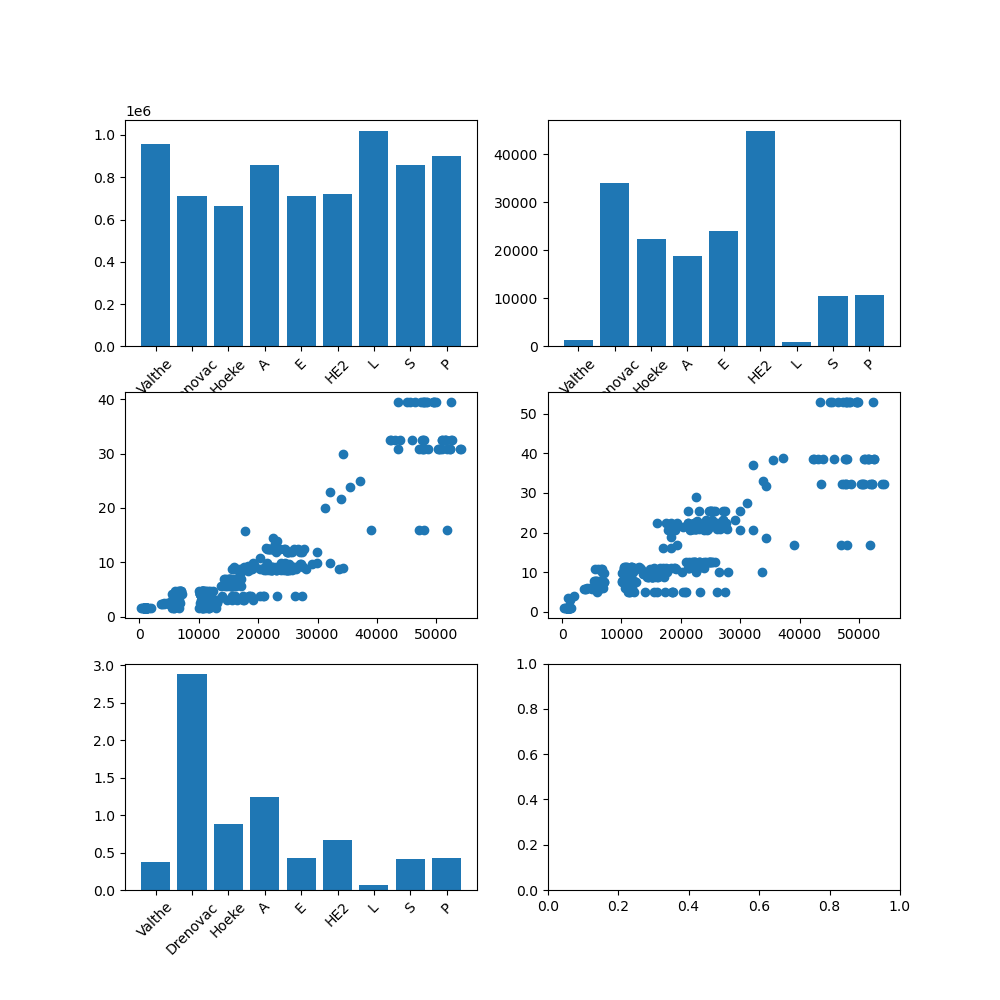

<ipython-input-14-631ebc1884e7>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sites, rotation=45)
<ipython-input-14-631ebc1884e7>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sites, rotation=45)
<ipython-input-14-631ebc1884e7>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(sites, rotation=45)


[Text(0, 0, 'Valthe'),
 Text(1, 0, 'Drenovac'),
 Text(2, 0, 'Hoeke'),
 Text(3, 0, 'A'),
 Text(4, 0, 'E'),
 Text(5, 0, 'HE2'),
 Text(6, 0, 'L'),
 Text(7, 0, 'S'),
 Text(8, 0, 'P')]

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

sites =  ['Valthe', 'Drenovac', 'Hoeke', 'A', 'E', 'HE2', 'L', 'S', 'P']
sio2 =   [df.SiO2[df['SAMPLE'].str.startswith("V")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("D")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("A")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("E")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("HE")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("L")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("S")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("P")].mean()]

Fe =   [df.Fe[df['SAMPLE'].str.startswith("V")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("D")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("A")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("E")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("HE")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("L")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("S")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("P")].mean()]

Kabs =   [df.kfd_abs[df['SAMPLE'].str.startswith("V")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("D")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("A")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("E")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("HE")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("L")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("S")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("P")].mean()]

ax1.bar(sites, sio2)
ax1.set_xticklabels(sites, rotation=45)

ax2.bar(sites, Fe)
ax2.set_xticklabels(sites, rotation=45)

ax3.scatter(df.Fe, df.CEC)


ax4.scatter(df.Fe, df.Clay)

ax5.bar(sites, Kabs)
ax5.set_xticklabels(sites, rotation=45)


#ax6.bar(sites, bound)
#ax6.set_xticklabels(sites, rotation=45)

<IPython.core.display.Javascript object>


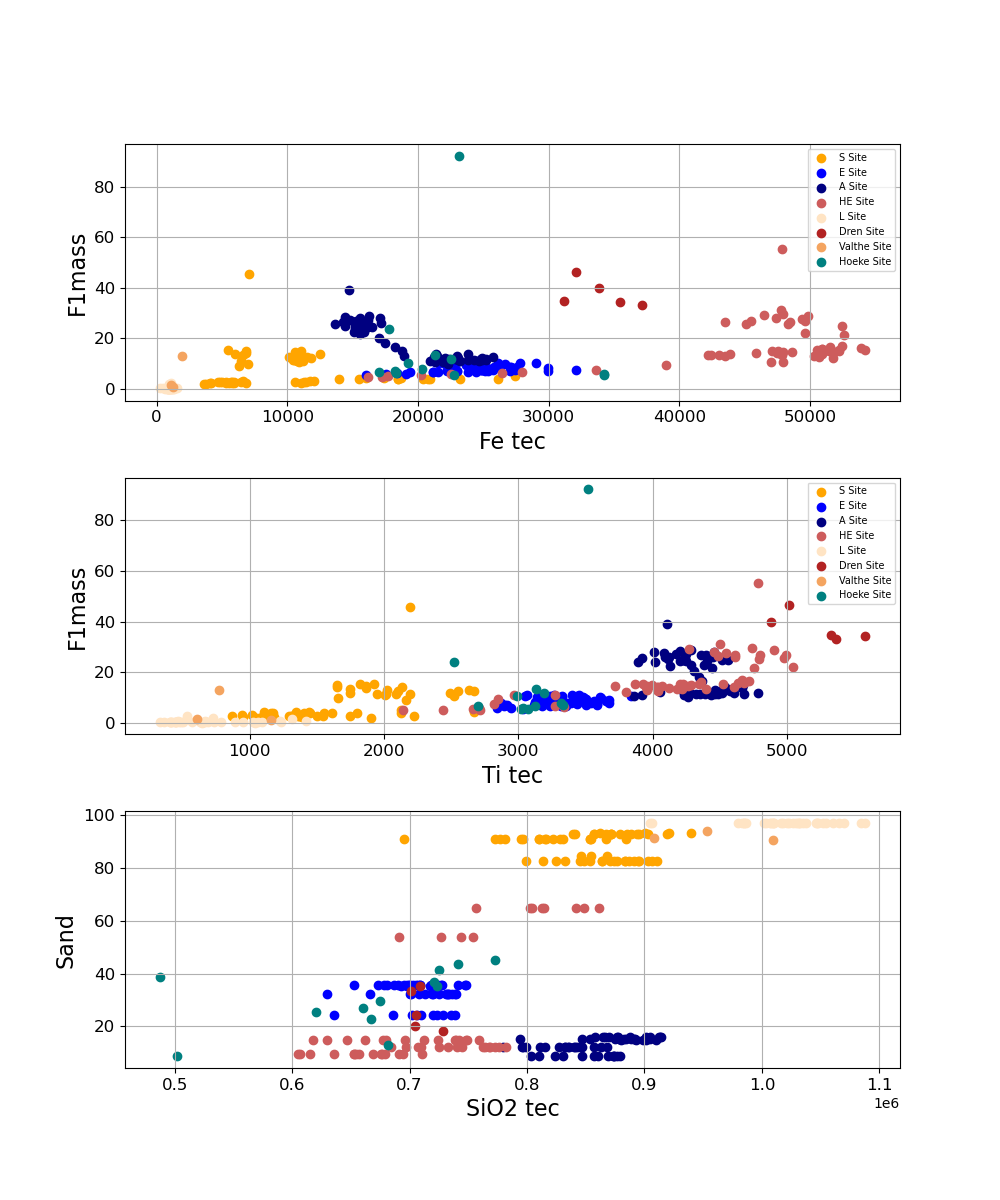

In [ ]:
fig, ((rx1, rx2, rx3)) = plt.subplots(3, 1,  figsize=(10, 12))
fig.subplots_adjust(hspace=0.3)

rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("A")], df.F1mass[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')

rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("A")], df.F1mass[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')

rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("S")], df.Sand[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("E")], df.Sand[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("A")], df.Sand[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("HE")], df.Sand[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("L")], df.Sand[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("D")], df.Sand[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("V")], df.Sand[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("HOEKE")], df.Sand[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


graphsf.elem(rx1, rx2, rx3, plt)